In [115]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import os
import random


from empirical_data import *
from optimized_random_response import *
from randomized_response import *
from repetitive_optimizer import *
from synthetic_dataset import *
from exponential_mechanism import *
from simpleinfotheory import *
from normalize_error_matrix import *
from rappor_mechanism import *


## Generate Synthetic Datasets

In [116]:
from alphabet import *

NUM_ATTRIBUTES = 2
NUM_STATES = [3, 3]
DATASET_SIZE = 10000

priority_dict = {} # {'0': 2, '1': 0.5}

TOTAL_STATES = 1
alphabet_dict = {}
for i in range(NUM_ATTRIBUTES):
    TOTAL_STATES *= NUM_STATES[i]
    alphabet_dict[str(i)] = np.arange(NUM_STATES[i])

ALL_ALPHABET = create_alphabet(attributes_with_alphabet=alphabet_dict)
STRING_ALL_ALPHABET = convert_alphabet_to_string(ALL_ALPHABET)
ATTRIBUTE_LIST = list(alphabet_dict.keys())
# random_dist = np.array([random.randint(1, 5000) for i in range(TOTAL_STATES)])
# random_dist = random_dist/np.sum(random_dist)
random_dist = [0.2, 0.11, 0.01, 0.01, 0.20, 0.11, 0.01, 0.11, 0.24] # [0.3, 0.01, 0.01, 0.01, 0.30, 0.01, 0.01, 0.01, 0.34]
# random_dist = [0.25, 0.25, 0.25, 0.25] # [0.5, 0.025, 0.025, 0.45]

print("Alphabet ", ALL_ALPHABET)
print("ATTRIBUTE_LIST ", ATTRIBUTE_LIST)

synthetic_dataset_constructor = Gen_Synthetic_Dataset(no_of_states = TOTAL_STATES, no_of_samples = DATASET_SIZE, alphabet=STRING_ALL_ALPHABET)
correlated_synthetic_dataset = synthetic_dataset_constructor.gen_custom(distribution=random_dist)

uniform_synthetic_dataset = synthetic_dataset_constructor.gen_uniform()



Alphabet  [[0 0]
 [0 1]
 [0 2]
 [1 0]
 [1 1]
 [1 2]
 [2 0]
 [2 1]
 [2 2]]
ATTRIBUTE_LIST  ['0', '1']


## Claculate Error Matrix

{'[0 0]': 0, '[0 1]': 1, '[0 2]': 2, '[1 0]': 3, '[1 1]': 4, '[1 2]': 5, '[2 0]': 6, '[2 1]': 7, '[2 2]': 8}


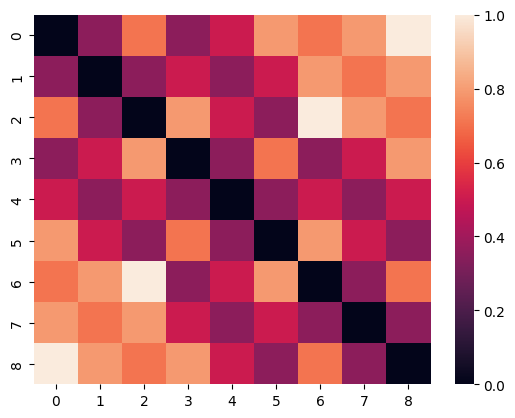

In [117]:
alphabet_dict = {}
for i in range(len(ALL_ALPHABET)):
    alphabet_dict[str(ALL_ALPHABET[i])] = i
print(alphabet_dict)
normalize_error_matrix = Normalize_error_matrix(attribute_list=ATTRIBUTE_LIST, alphabet=ALL_ALPHABET, priority_dict=priority_dict, alphabet_dict=alphabet_dict)
err_matrix = normalize_error_matrix.normalized_error_matrix
sns.heatmap(err_matrix)
plt.show()

## Calculate Mutual Information

### Pair-wise information leakage of A: I(A;A')

In [118]:
def mutual_info_pair(a, b):
    return mutualinformationempirical(xn=a, yn=b)[0]

### Total information leakage of A: I(A;A',B')

In [119]:
# I(A;A',B') = I(A;A') + I(A;B'|A')

def conditional_mutual_info(a, b, c):
    return conditionalmutualinformationempirical(a, b, c)

def total_info_leakage(A, A_prime, B_prime):
    return  mutual_info_pair(A, A_prime) + conditional_mutual_info(A, B_prime, A_prime)
    # return  mutual_info_pair(A, B_prime) - conditional_mutual_info(A, B_prime, A_prime)

In [120]:
def mutual_information(a, b):
    processed_a = []
    # print(a)
    # print(b)
    for i in a:
        actual_split = i.split(" ")
        actual = []
        # print(actual_split)
        for j in actual_split:
            # print(i)
            if j != "" :
                actual.append(int(j))
        processed_a.append(np.array(actual))
    processed_a = np.array(processed_a)
    processed_b = []
    
    for i in b:
        actual_split = i.split(" ")
        actual = []
        # print(actual_split)
        for j in actual_split:
            # print(i)
            if j != "" :
                actual.append(int(j))
        processed_b.append(np.array(actual))
    processed_b = np.array(processed_b)

    mi = []
    # print("processed_a", processed_a)
    # print("processed_b", processed_b)
    # for i in range(np.shape(processed_b)[1]):
    #     mi.append(mutual_info_pair(processed_a[:,i], processed_b[:,i]))
    # mi.append(mutual_info_pair(processed_a[:,0], processed_a[:,1]))
    # mi.append(mutual_info_pair(processed_b[:,1], processed_b[:,0]))
    # mi.append(mutual_info_pair(processed_a[:,0], processed_b[:,0]))
    # mi.append(mutual_info_pair(processed_a[:,1], processed_b[:,1]))
    # mi.append(total_info_leakage(processed_a[:,0], processed_b[:,0], processed_b[:,1]))
    mi.append(total_info_leakage(processed_a[:,1], processed_b[:,1], processed_b[:,0]))
    # mi.append(total_info_leakage(processed_a[:,0], processed_b[:,1], processed_b[:,0]))
    return mi
    

## Benchmark Optimal Mechanism

In [121]:
EPS_ARRAY = np.arange(40)*0.25

### Correlated Distribution

0.0
l2_error  0.7770377393060711
0.25
l2_error  0.7874557267682039
0.5
l2_error  0.8224189511535474
0.75
l2_error  0.8792585117570589
1.0
l2_error  0.9500217879157133
1.25
l2_error  0.9356624110966689
1.5
l2_error  1.0040923589600035
1.75
l2_error  1.0487198843403496
2.0


/Users/sandarujayawardana/Documents/Python_code/.venv/lib/python3.11/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


l2_error  1.157136396215868
2.25
l2_error  1.3001320356370818
2.5
l2_error  1.3724308562325238
2.75
l2_error  1.4089859857856157
3.0
l2_error  1.5670834339143482
3.25
l2_error  1.5900989917004773
3.5
l2_error  1.7378935317028734
3.75
l2_error  1.6306810605618045
4.0
l2_error  1.672148342041714
4.25
l2_error  1.3328438579939357
4.5
l2_error  1.461250020716009
4.75
l2_error  1.1920962185692927
5.0
l2_error  1.0656993415409775
5.25
l2_error  0.9902049824455426
5.5
l2_error  0.6179499397306343
5.75
l2_error  0.7792345875739968
6.0
l2_error  1.0624769915910397
6.25
l2_error  2.8350239348817097e-05


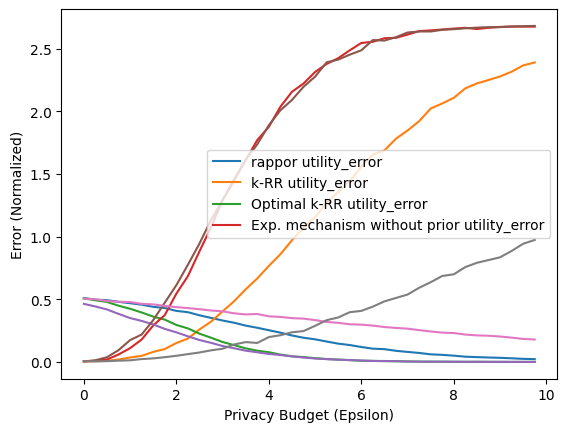

In [122]:
exponential_mechanism_without_prior = Exponential_mechanism(prior_dist=random_dist, STATE_COUNT=TOTAL_STATES, INPUT_ALPHABET=STRING_ALL_ALPHABET, normalized_objective_err_matrix=err_matrix, only_err_matrix=True)

exponential_mechanism_with_prior = Exponential_mechanism(prior_dist=random_dist, STATE_COUNT=TOTAL_STATES, INPUT_ALPHABET=STRING_ALL_ALPHABET, normalized_objective_err_matrix=err_matrix, only_err_matrix=False)

random_response_mechanism = Randomized_Response(STATE_COUNT=TOTAL_STATES, INPUT_ALPHABET=STRING_ALL_ALPHABET, normalized_objective_err_matrix=err_matrix)

optimal_random_response_mechanism = Optimized_Randomized_Response(prior_dist = random_dist, STATE_COUNT = TOTAL_STATES, INPUT_ALPHABET = STRING_ALL_ALPHABET, normalized_objective_err_matrix = err_matrix, 
                 TOLERANCE_MARGIN = 0.01, APPROXIMATION = "LINEAR", solver = "SCS", is_kl_div = True, ALPHA=0.01, accelerate_from_rr=True)

rappor_mechanism = Rappor_mechanism(STATE_COUNT=TOTAL_STATES, INPUT_ALPHABET = STRING_ALL_ALPHABET, prob_f=0.5, prob_p=0.25, prob_q=0.75, collection_count = 20)
# mechanisms_dict = {"Exp. mechanism without prior": exponential_mechanism_without_prior, "Exp. mechanism with prior": exponential_mechanism_with_prior, "k-RR": random_response_mechanism, "Optimal k-RR": optimal_random_response_mechanism}
# mechanisms_dict = {"k-RR": random_response_mechanism, "Optimal k-RR": optimal_random_response_mechanism}
mechanisms_dict = {"rappor": rappor_mechanism, "k-RR": random_response_mechanism, "Optimal k-RR": optimal_random_response_mechanism, "Exp. mechanism without prior": exponential_mechanism_without_prior}

error_dict = {}
mi_dict = {}
total_mi_dict = {}

for key in list(mechanisms_dict.keys()):
    error_dict[key] = []
    mi_dict[key] = []
    total_mi_dict[key] = []

for eps in EPS_ARRAY:
    # print(eps)
    for mechanism in list(mechanisms_dict.keys()):
        __tot_error = 0
        __perturbed_value_list = []
        for entry in correlated_synthetic_dataset:
            # entry = entry_np_value[0]
            if mechanism == "rappor":
                __perturbed_value_list.append(mechanisms_dict[mechanism].gen_random_output(actual_value=entry, eps=eps, prob_f=eps/10, is_eps=True)[0])
            else:
                __perturbed_value_list.append(mechanisms_dict[mechanism].gen_random_output(actual_value=entry, eps=eps)[0])
            # print(entry,__perturbed_value_list[-1])
            __error = normalize_error_matrix.get_value_error(actual=entry, perturbed=__perturbed_value_list[-1])
            __tot_error += __error
        error_dict[mechanism].append(__tot_error/len(uniform_synthetic_dataset))
        mi_dict[mechanism].append(mutual_info_pair(correlated_synthetic_dataset, __perturbed_value_list))
        # total_mi_dict[mechanism].append(total_info_leakage(correlated_synthetic_dataset, __perturbed_value_list, ))
        # mi_dict[mechanism].append(mutual_information(correlated_synthetic_dataset, __perturbed_value_list))

        # if mechanism == "Optimal k-RR":
        #     optimal_mechanism = mechanisms_dict[mechanism].get_mechanism(eps=eps)
            
            # posterior_prob_distribution = np.zeros(TOTAL_STATES)
            # posterior_joint_prob = np.zeros((TOTAL_STATES, TOTAL_STATES))
            # for i in range(TOTAL_STATES):
            #     posterior_joint_prob[:,i] = np.reshape(optimal_mechanism[:,i] * np.array(random_dist), (4,))
            #     posterior_prob_distribution[i] = np.sum(optimal_mechanism[:,i] * np.array(random_dist))
            # print("posterior_prob_distribution ", posterior_prob_distribution)
            # print("Distance ", np.linalg.norm((random_dist-posterior_prob_distribution), 2))
            # sns.heatmap(optimal_mechanism)
            # plt.show()
lagends = []
for mechanism in list(mechanisms_dict.keys()):
    lagends.append(mechanism + " utility_error")
    plt.plot(EPS_ARRAY, error_dict[mechanism])
    # lagends.append(mechanism + " info_leakage")
    # plt.plot(EPS_ARRAY, mi_dict[mechanism])
    # lagends.append(mechanism + " total_info_leakage")
    # plt.plot(EPS_ARRAY, total_mi_dict[mechanism])
    # for mi_ in range(len(mi_dict[mechanism][0])):
    plt.plot(EPS_ARRAY, np.array(mi_dict[mechanism]))
    #     lagends.append(f"{mechanism}")
        # legend.append(f"MI for Optimal, attr:{grouped_attributes_list[i][mi_]}")

plt.legend(lagends)
plt.xlabel("Privacy Budget (Epsilon)")
plt.ylabel("Error (Normalized)")
# plt.title(f"{error_cal_type} error between original value and perturbed value for {Attr_list}")
plt.show()

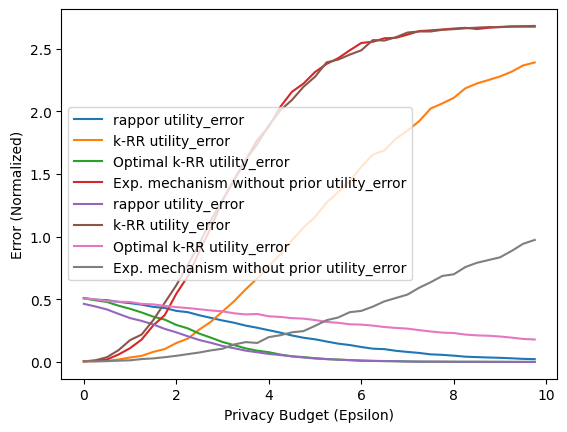

In [123]:
for mechanism in list(mechanisms_dict.keys()):
    lagends.append(mechanism + " utility_error")
    plt.plot(EPS_ARRAY, error_dict[mechanism])
    # lagends.append(mechanism + " info_leakage")
    # plt.plot(EPS_ARRAY, mi_dict[mechanism])
    # lagends.append(mechanism + " total_info_leakage")
    # plt.plot(EPS_ARRAY, total_mi_dict[mechanism])
    plt.plot(EPS_ARRAY, np.array(mi_dict[mechanism]))
    #     lagends.append(f"{mechanism}")
        # legend.append(f"MI for Optimal, attr:{grouped_attributes_list[i][mi_]}")

plt.legend(lagends)
plt.xlabel("Privacy Budget (Epsilon)")
plt.ylabel("Error (Normalized)")
# plt.title(f"{error_cal_type} error between original value and perturbed value for {Attr_list}")
plt.show()

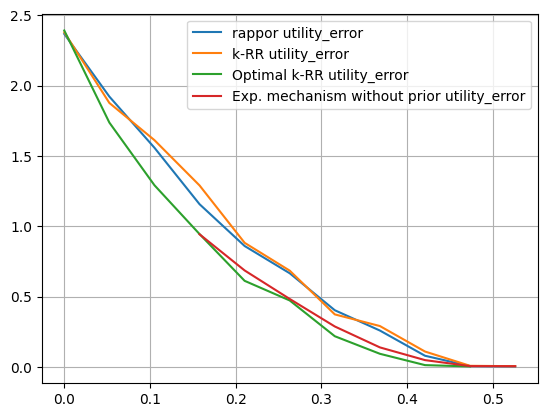

In [124]:
utility_error = np.arange(20)
utility_error = utility_error/np.max(utility_error)

tolerance = (utility_error[1] - utility_error[0])/2

info_dict = {}

for mechanism in list(mechanisms_dict.keys()):
    info_dict[mechanism] = []
    for i in utility_error:
        info_dict[mechanism].append(np.nan)

for index_1, i in enumerate(utility_error):
    for mechanism in list(mechanisms_dict.keys()):
        for index_, j in enumerate(error_dict[mechanism]):
            if abs(i-j) < tolerance:
                info_dict[mechanism][index_1] = (mi_dict[mechanism][index_])
                break

lagends = []
for mechanism in list(mechanisms_dict.keys()):
    lagends.append(mechanism + " utility_error")
    plt.plot(utility_error, info_dict[mechanism])

plt.legend(lagends)
plt.grid(visible=True)
plt.show()


In [125]:
info_dict

{'rappor': [2.3669872011904634,
  1.9217433114925067,
  1.5581530218929114,
  1.1570738532278773,
  0.8599895568033364,
  0.6662515316708344,
  0.4034164172432426,
  0.25922729750588225,
  0.08009397299250853,
  0.00649373164589484,
  0.003864375766222672,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan],
 'k-RR': [2.378768630001941,
  1.8766134335185232,
  1.6121459213349878,
  1.2904364684982896,
  0.8825861622229922,
  0.6848737652176178,
  0.37398239197511174,
  0.2911912525610063,
  0.11001656964084017,
  0.008527327985008881,
  0.005987146782137742,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan],
 'Optimal k-RR': [2.391537529150267,
  1.73710684910212,
  1.2917689009161935,
  0.9448082524593282,
  0.6124528902431416,
  0.47298652351627357,
  0.21876515617934622,
  0.09403048024057625,
  0.01352595084839514,
  0.004107246847143919,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan],
 'Exp. mechanism without prior': [nan,
  nan,
  na

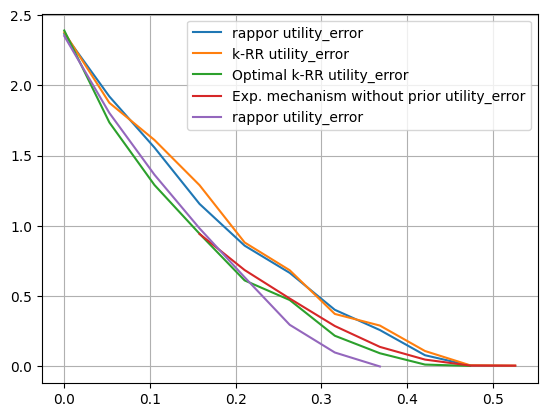

In [126]:
for mechanism in list(mechanisms_dict.keys()):
    lagends.append(mechanism + " utility_error")
    plt.plot(utility_error, info_dict[mechanism])
plt.plot(utility_error, aa)
plt.legend(lagends)
plt.grid(visible=True)
plt.show()

In [127]:
# aa = info_dict["Optimal k-RR"]

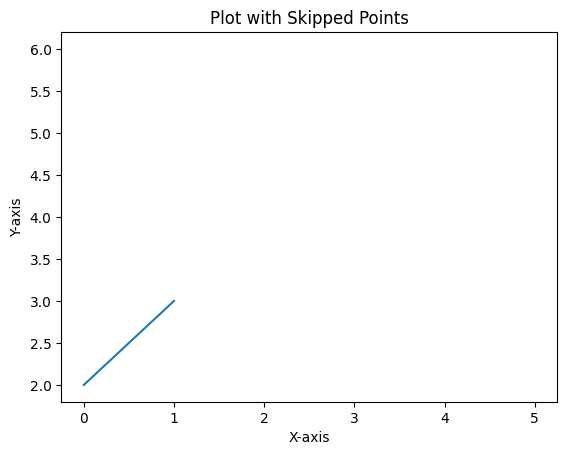

In [128]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data with some points set to np.nan
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([2, 3, np.nan, 5, np.nan, 6])

# Plotting
plt.plot(x, y)
plt.title('Plot with Skipped Points')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()
